# Milestone 5
# DSC540
# Sarah Theriot

# Step 1: Load the Datasets

In [38]:
import pandas as pd

# Load the datasets into pandas DataFrames
nest_data_path = r"C:\Users\sarah\OneDrive\Desktop\MSDS\Data Preparation\Course Project\cleaned_nest_data.csv"
temperature_data_path = r"C:\Users\sarah\cleaned_global_temperature_2023.csv"

nest_data = pd.read_csv(nest_data_path)
temperature_data = pd.read_csv(temperature_data_path)

# Show the first few rows of each dataset to confirm the load
print("Nest Data:")
print(nest_data.head())

print("Temperature Data:")
print(temperature_data.head())

Nest Data:
   ObjectID                              GlobalID     CreationDate  \
0         1  1693b78f-11c1-441f-a3af-9defee57a25a  5/15/2023 18:48   
1         2  48158211-01ac-45d4-8e99-3d81d98d0bb8  5/16/2023 13:27   
2         3  97a5c857-76e6-4019-ad95-04fabc265b83  5/17/2023 13:32   
3         4  89419d65-7260-4347-8218-de084cbf5f19  5/18/2023 17:20   
4         5  fa50f119-000e-400a-944c-908fe282e896  5/21/2023 14:12   

                           Creator         EditDate  \
0  danielle_bumgardner@fws.gov_fws  5/15/2023 18:48   
1  danielle_bumgardner@fws.gov_fws   8/6/2023 17:28   
2           david_seay@fws.gov_fws  7/25/2023 19:45   
3  danielle_bumgardner@fws.gov_fws    8/1/2023 1:34   
4  danielle_bumgardner@fws.gov_fws  7/30/2023 14:12   

                            Editor  Nest # ID             Date Species  \
0  danielle_bumgardner@fws.gov_fws      333.0  5/15/2023 18:47      Dc   
1  danielle_bumgardner@fws.gov_fws        1.0  5/12/2023 13:26      Cc   
2  danielle_bum

# Step 2: Check for 'Year' Column and Merge Data

In [40]:
# Ensure both datasets have the 'Year' column
if 'Year' in nest_data.columns and 'Year' in temperature_data.columns:
    print("Both datasets contain the 'Year' column.")
else:
    print("One or both datasets are missing the 'Year' column.")

# Merge the datasets on the 'Year' column
merged_data = pd.merge(nest_data, temperature_data, on="Year", how="left")

# Show the first few rows of the merged data
print("Merged Data:")
print(merged_data.head())

Both datasets contain the 'Year' column.
Merged Data:
   ObjectID                              GlobalID     CreationDate  \
0         1  1693b78f-11c1-441f-a3af-9defee57a25a  5/15/2023 18:48   
1         2  48158211-01ac-45d4-8e99-3d81d98d0bb8  5/16/2023 13:27   
2         3  97a5c857-76e6-4019-ad95-04fabc265b83  5/17/2023 13:32   
3         4  89419d65-7260-4347-8218-de084cbf5f19  5/18/2023 17:20   
4         5  fa50f119-000e-400a-944c-908fe282e896  5/21/2023 14:12   

                           Creator         EditDate  \
0  danielle_bumgardner@fws.gov_fws  5/15/2023 18:48   
1  danielle_bumgardner@fws.gov_fws   8/6/2023 17:28   
2           david_seay@fws.gov_fws  7/25/2023 19:45   
3  danielle_bumgardner@fws.gov_fws    8/1/2023 1:34   
4  danielle_bumgardner@fws.gov_fws  7/30/2023 14:12   

                            Editor  Nest # ID             Date Species  \
0  danielle_bumgardner@fws.gov_fws      333.0  5/15/2023 18:47      Dc   
1  danielle_bumgardner@fws.gov_fws        1.0 

# Step 3: Visualization of Merged Data

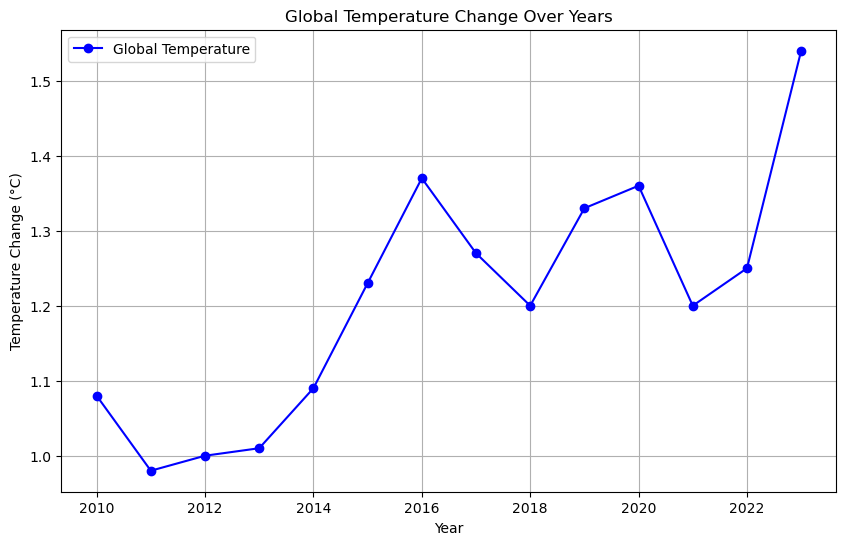

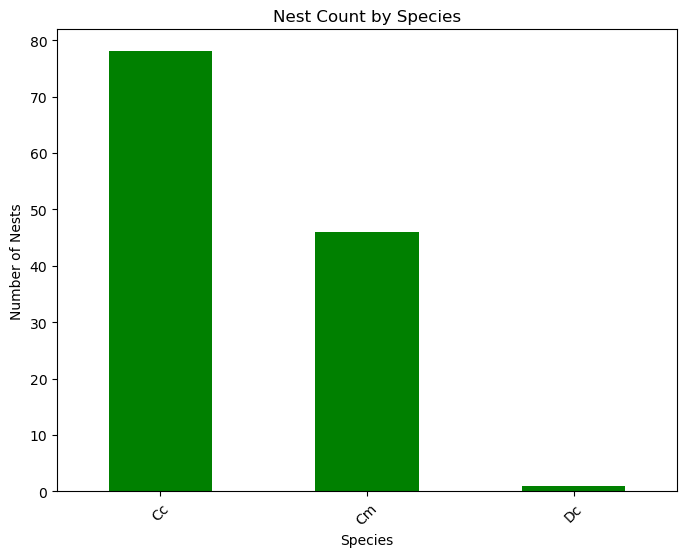

In [44]:
# Temperatures Over the Years
import matplotlib.pyplot as plt

# Plotting the average temperature per year
plt.figure(figsize=(10,6))
plt.plot(temperature_data['Year'], temperature_data['Warming'], marker='o', color='b', label='Global Temperature')
plt.title('Global Temperature Change Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.legend()
plt.show()

# Nest Data Count By Species
# Counting the number of nests by species
species_count = nest_data['Species'].value_counts()

# Plotting the number of nests for each species
plt.figure(figsize=(8,6))
species_count.plot(kind='bar', color='green')
plt.title('Nest Count by Species')
plt.xlabel('Species')
plt.ylabel('Number of Nests')
plt.xticks(rotation=45)
plt.show()

# Step 4: Save the Merged Data

In [47]:
# Save the merged dataset to a new CSV file
merged_data_path = r"C:\Users\sarah\OneDrive\Desktop\MSDS\Data Preparation\Course Project\merged_nest_temperature_data.csv"
merged_data.to_csv(merged_data_path, index=False)

print(f"Merge completed successfully! The merged data has been saved to: {merged_data_path}")

Merge completed successfully! The merged data has been saved to: C:\Users\sarah\OneDrive\Desktop\MSDS\Data Preparation\Course Project\merged_nest_temperature_data.csv


# Short Summary
## Introduction:
### This project was about merging different datasets to understand how climate change might affect sea turtle nesting, and how to analyze this information with SQL and visualizations. I worked with Nest Data and Temperature Data to see if temperature changes could be linked to changes in turtle nesting behavior.

## Data Transformations:
### The first step was cleaning up the data. I made sure both datasets were in the right format and that they shared the same key column: Year. After cleaning, I loaded each dataset into an SQLite database, creating separate tables for each. Then, I merged them using SQL so I could work with the combined data. The main changes were making sure the columns matched up, and that the data could be linked correctly, but I didn’t change any of the actual numbers or facts in the datasets.

## Ethical Implications:
### Handling environmental data like this comes with some important ethical considerations. First, I had to be careful to ensure the data was accurate and not misleading, as wrong conclusions could harm conservation efforts. I used data from reliable sources like government organizations, so I felt confident in its credibility. However, I also thought about privacy issues, especially with sensitive location information. For example, if this data were about endangered species' nests, I’d need to make sure the data didn't compromise their safety by revealing exact locations.

## Risks and Assumptions:
### One risk of transforming this data was that by merging the datasets only by Year, I may have overlooked important nuances like data collection methods or slight mismatches in timing. I assumed that comparing temperatures by year would give me a good picture of trends, but this could be problematic if the data wasn’t collected consistently across all years. It’s important to remember that this is an assumption, and it could affect the accuracy of the final results.

## Mitigating Ethical Risks:
### To avoid these risks, I made sure to check that the data sources were trustworthy and that I was careful about any assumptions I made during cleaning and merging. When dealing with sensitive data, it’s key to follow guidelines around privacy and ensure transparency in how the data is processed, which I made sure to do. If I had more time, I’d also look into other methods of validating the data to make sure it’s as accurate as possible.

## What I Learned:
### This project taught me a lot about how to merge data from different sources and how to visualize that data to spot trends. It was also a reminder of the responsibility that comes with working with environmental data. I learned how to use SQL for merging datasets and how to make visualizations with Matplotlib to help tell the story. Most importantly, it taught me to think about the ethical side of working with data, especially when it comes to protecting the information we use to make decisions.